# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

In [19]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Extract Data

### 1.1 Using Python Library

In [2]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:

df_wine_quality_features = pd.DataFrame(wine_quality['data']['features'])
df_wine_quality_targets = pd.DataFrame(wine_quality['data']['targets'])
df_wine_quality = pd.concat([df_wine_quality_features, df_wine_quality_targets], axis=1, join='inner')

df_wine_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 1.2 Reading from csv

In [4]:
df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

df_red_wine = pd.read_csv("data/winequality-red.csv",sep=";")

df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df_white_wine.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

## 2. Clean Data

### 2.1 Check for missing values

We are going to check if there are empty values.

In [7]:
df_wine_quality.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df_wine_quality.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [104]:
df_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [103]:
df_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observations from Checking Missing Values:**
1. There are no missing data in either dataset.
2. All feature columns are of the float type, and the target column is an integer.

### 2.2 Check for outliers

In [54]:
df_white_wine.wine_type = "White Wine"
df_red_wine.wine_type = "Red Wine"

def get_wine_str(wine_type_df):
    return getattr(wine_type_df, 'wine_type', "Unknown Wine")


In [59]:
## Q-Q 
# boxplot - log scale 

def create_qq_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    # Select only the numerical columns from the DataFrame
    numerical_columns = wine_type_df.select_dtypes(include=[np.number]).columns

    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    # Loop over the numerical columns and create a Q-Q plot for each
    for i, column in enumerate(numerical_columns[:12]):  
        data = wine_type_df[column]
        stats.probplot(data, dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q plot for {column}')

    # Adjust layout to prevent overlap
    fig.suptitle(f"QQ Plots for {wine_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

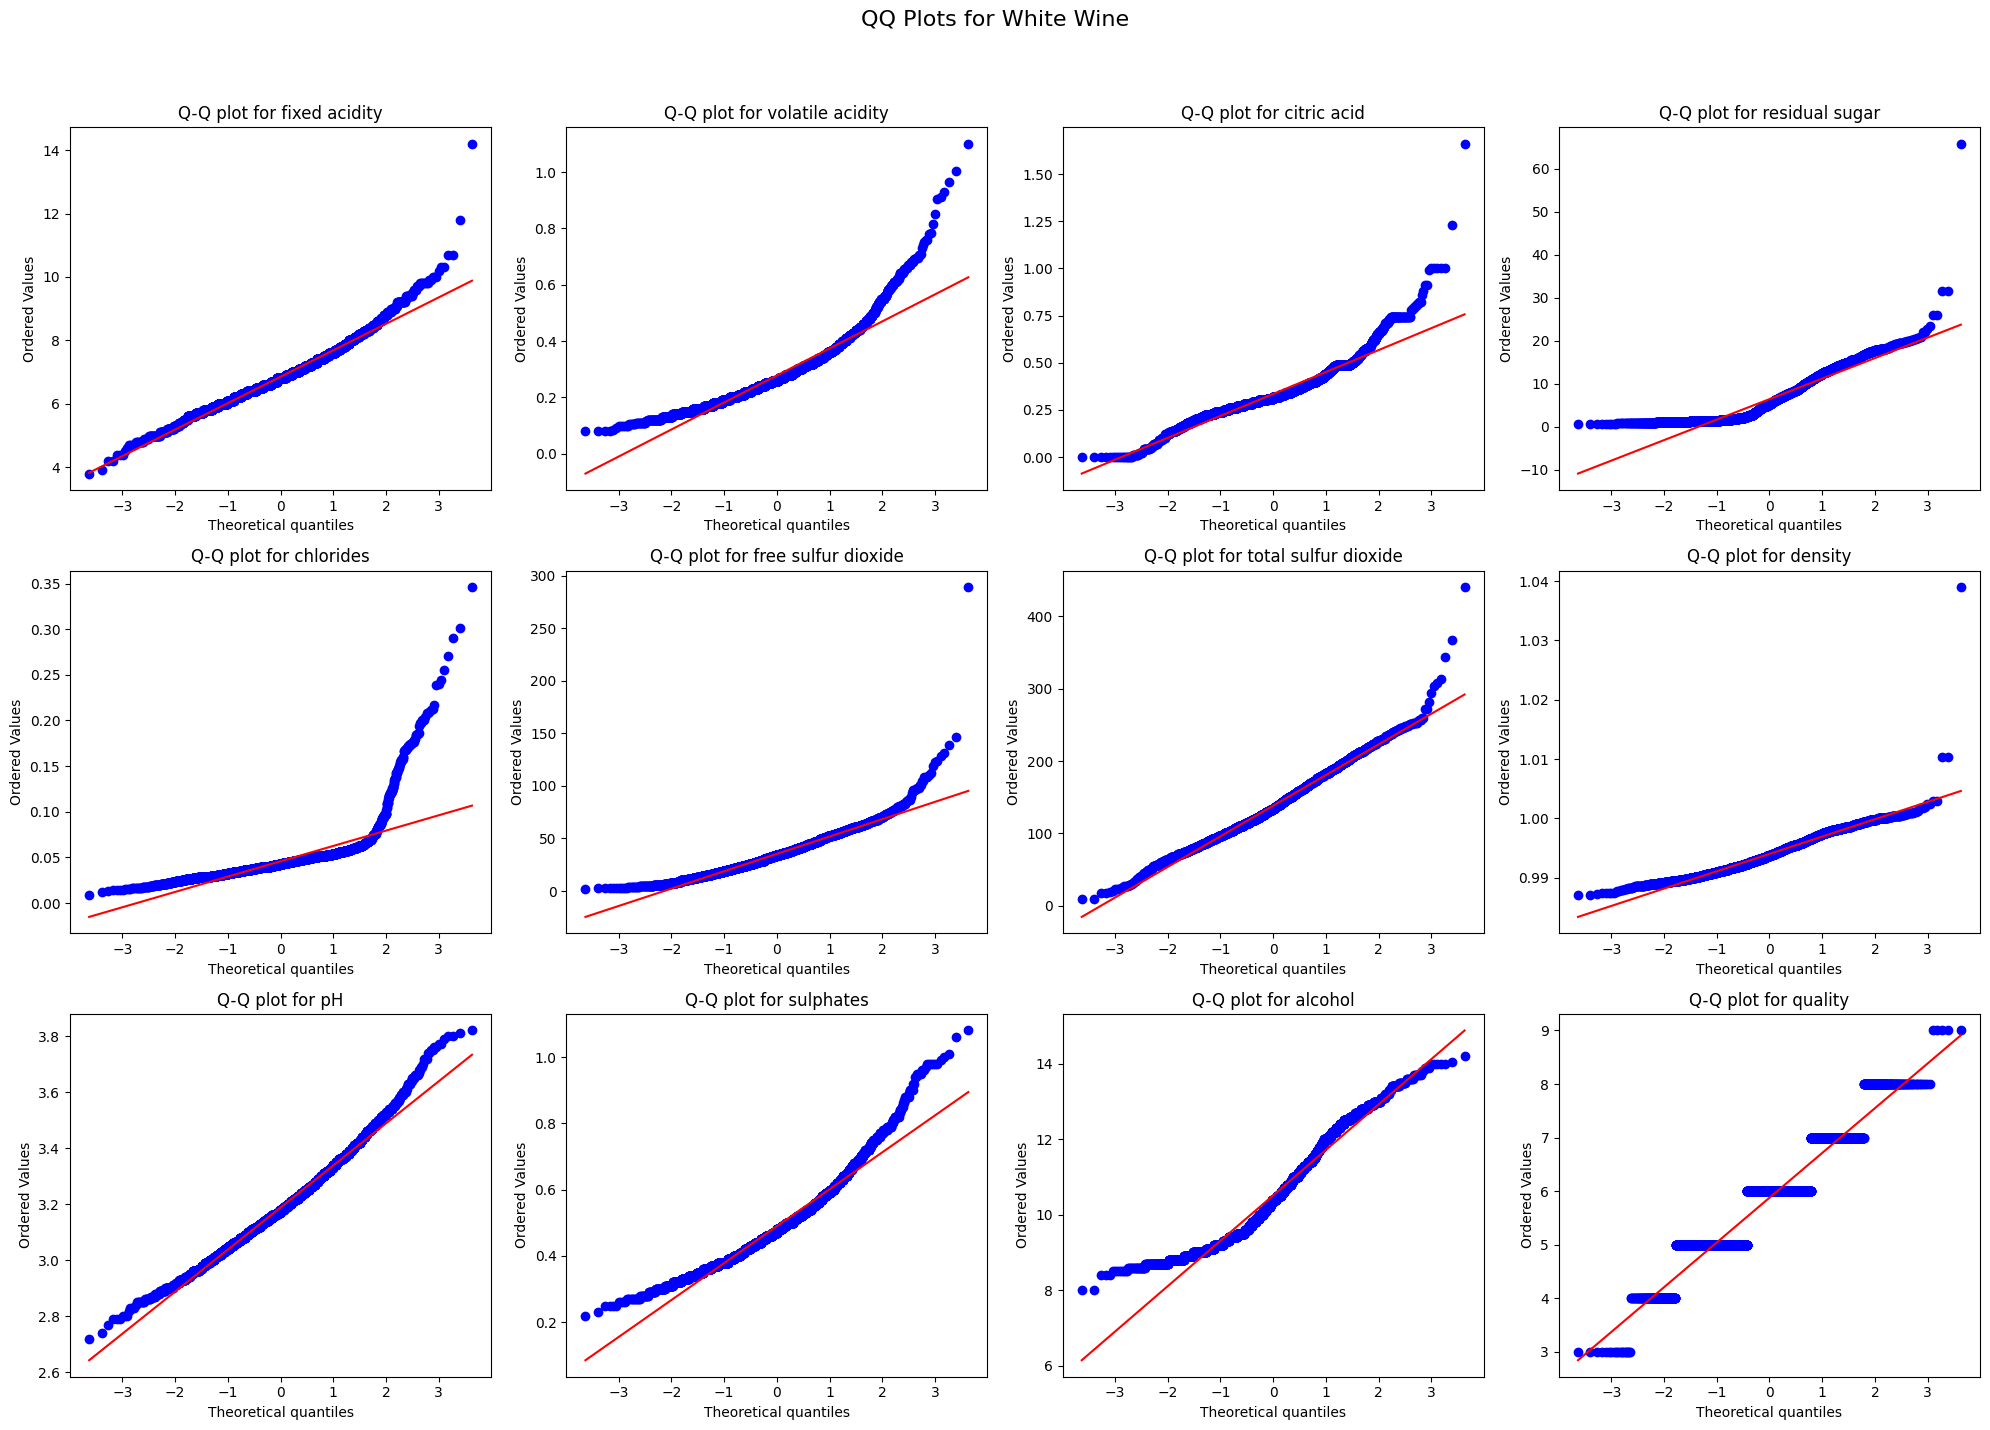

In [60]:
create_qq_plot(df_white_wine)

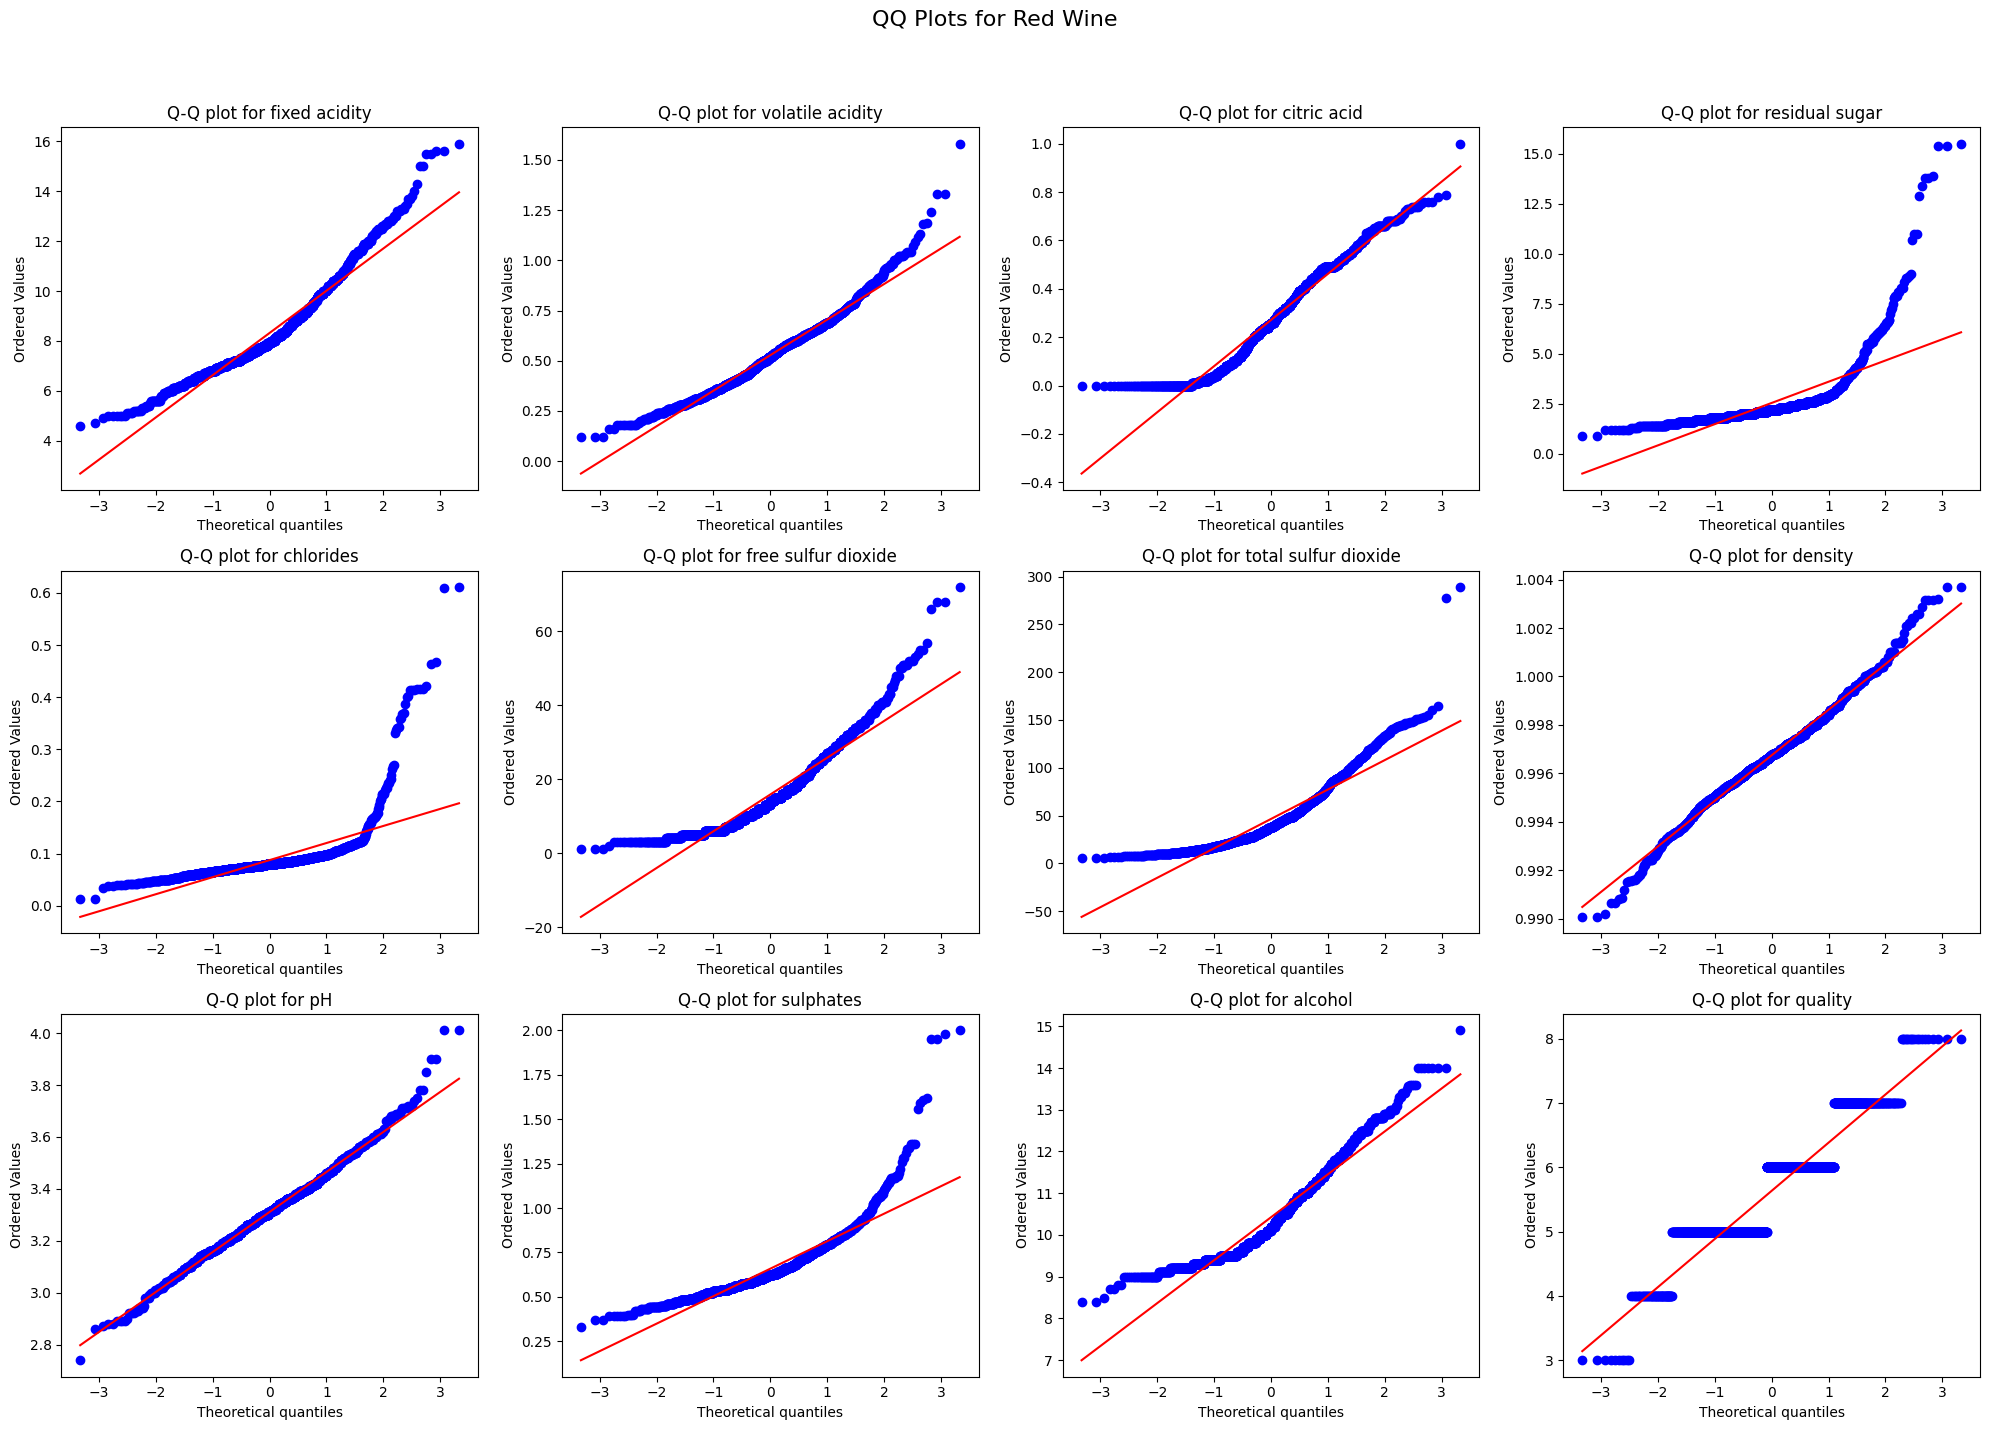

In [64]:
create_qq_plot(df_red_wine)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

In [78]:
def calculate_skewness_coefficient(wine_type_df):
    print(f"The skewness coefficient of {get_wine_str(wine_type_df)}:\n")

    for column in wine_type_df.columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")


In [79]:
calculate_skewness_coefficient(df_white_wine)

The skewness coefficient of White Wine:

fixed acidity: 0.65
volatile acidity: 1.58
citric acid: 1.28
residual sugar: 1.08
chlorides: 5.02
free sulfur dioxide: 1.41
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


In [80]:
calculate_skewness_coefficient(df_red_wine)

The skewness coefficient of Red Wine:

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 4.54
chlorides: 5.68
free sulfur dioxide: 1.25
total sulfur dioxide: 1.52
density: 0.07
pH: 0.19
sulphates: 2.43
alcohol: 0.86
quality: 0.22


### Observations from the skewness coefficient:

1. White Wine:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. Red Wine:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.
3. Conclusion:
   1. For features of highly skewness, we need to do log transformation. 
   2. For features of moderate skewness, we might do log transformation, depending on their importance.

In [101]:
#scatterplots

def create_scatter_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    features_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    
    # Set up the matplotlib figure
    rows, cols = 3, 4

    fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

    # Create a scatter plot for each feature column against the target
    for i, col in enumerate(features_columns):
        row = i // cols
        col_num = i % cols
        sns.scatterplot(data=wine_type_df, x='quality', y=col, color='green', marker='x',ax=axs[row, col_num])
        axs[row, col_num].set_title(f'{col} vs. Target')

    
    fig.suptitle(f"Scatter Plots for {wine_type}", fontsize=16)
    plt.tight_layout()
    plt.show()


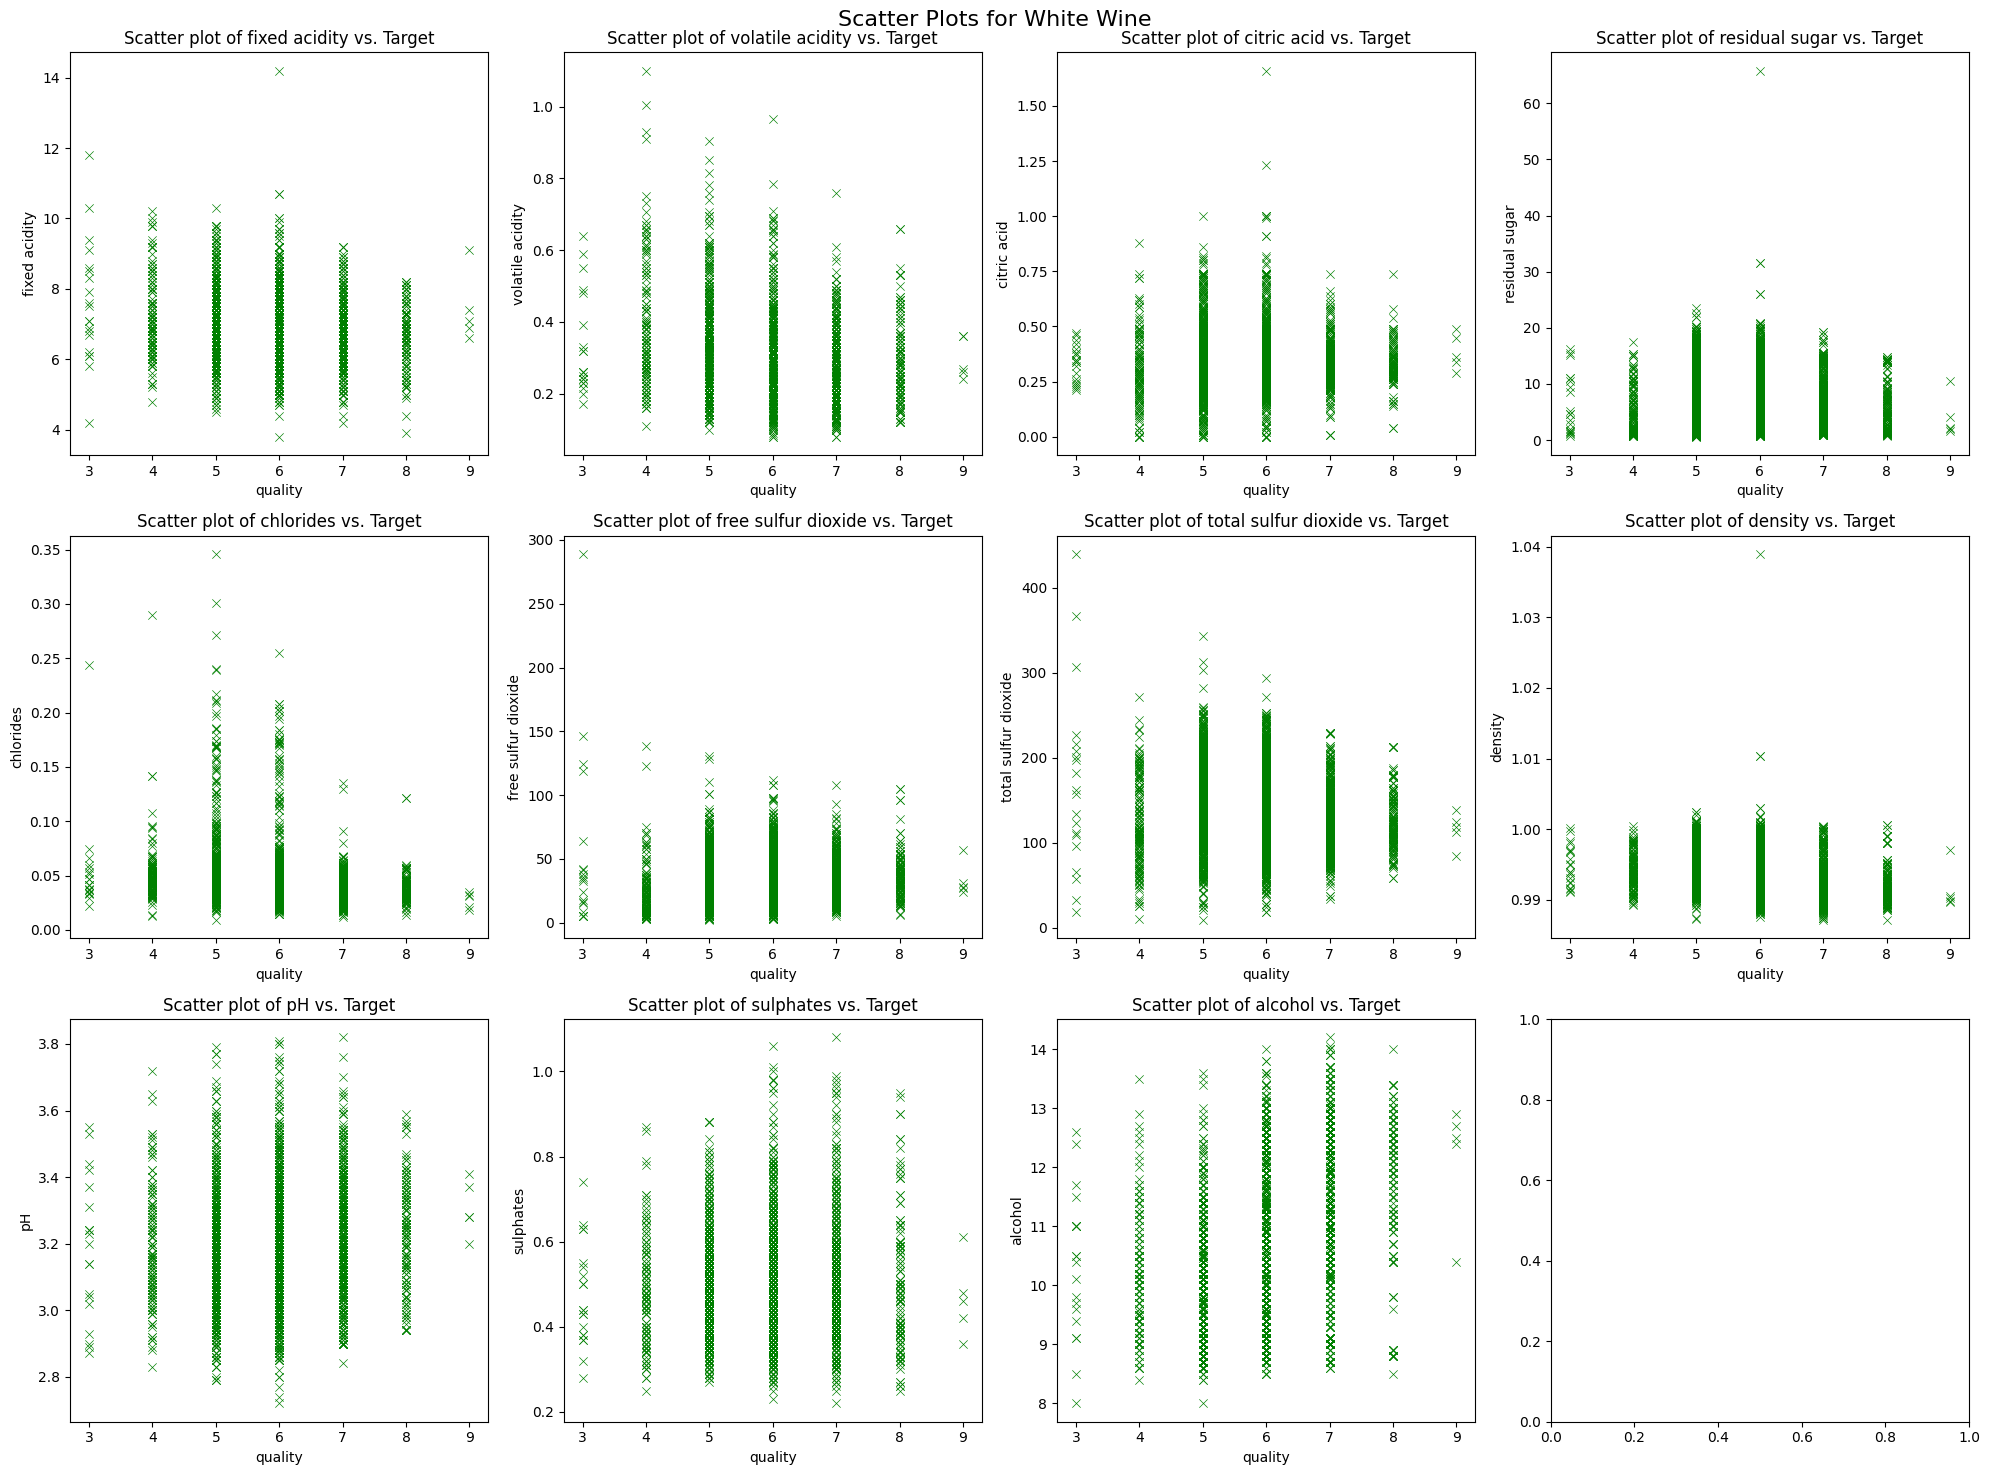

In [86]:
create_scatter_plot(df_white_wine)

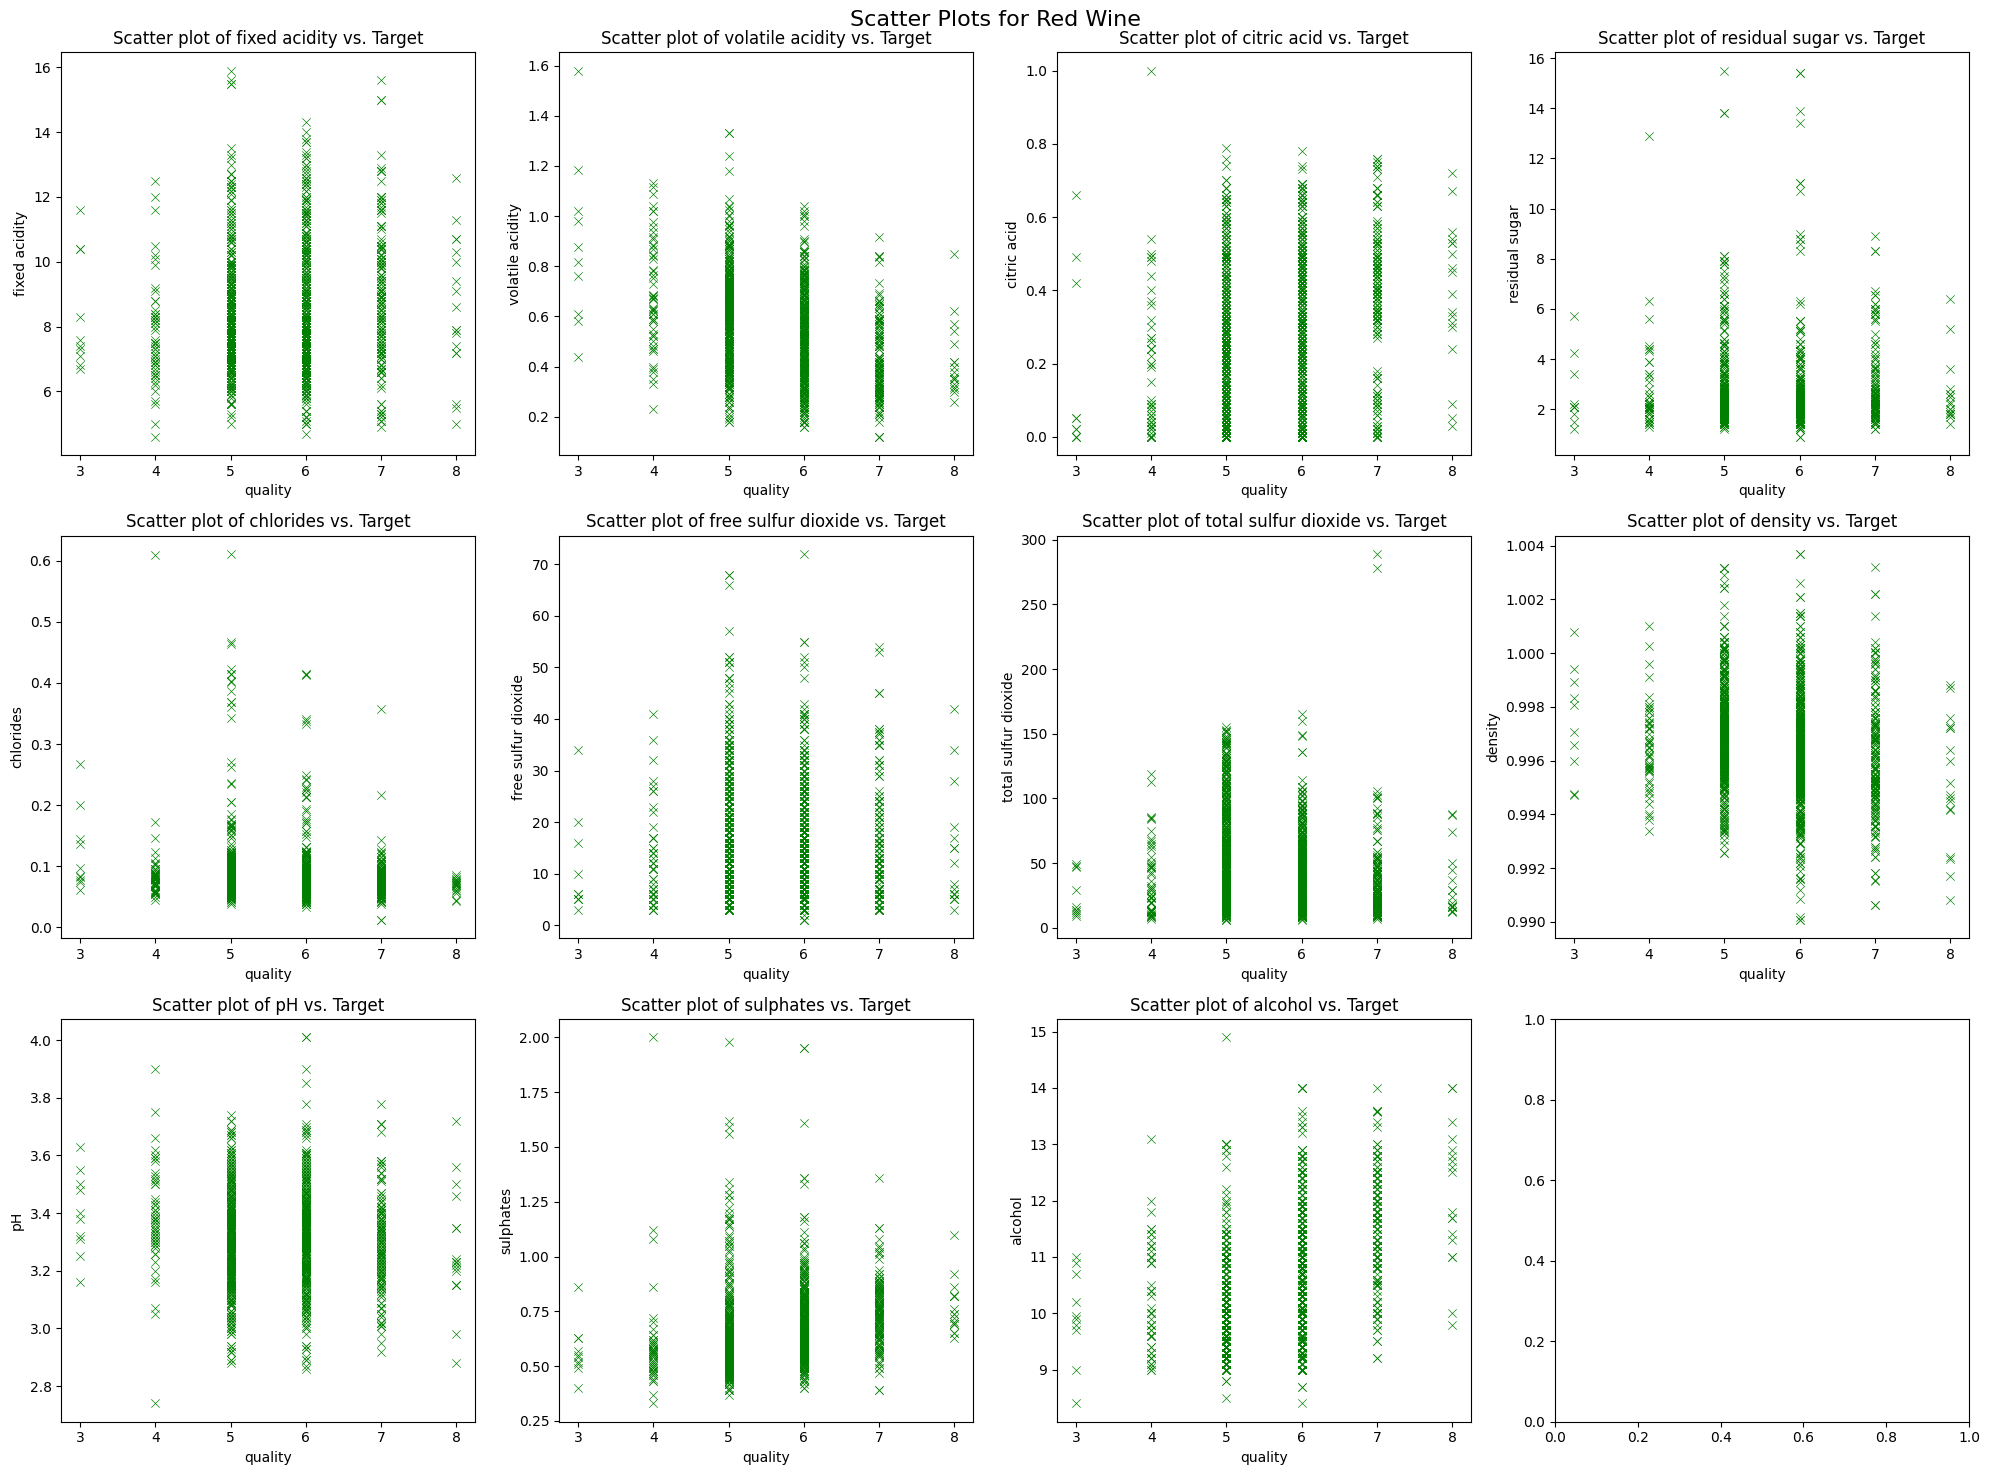

In [87]:
create_scatter_plot(df_red_wine)

**Observations from Scatter Plots**

1. **White Wine: Outliers in Lower Quality Wine**: Notable outliers are present in lower quality wines. Examples include volatile acidity in quality 4, citric acid in quality 6, and chlorides in quality 5. These outliers may be less concerning when focusing solely on higher quality wines but are important for comprehensive analysis.
2. **Red Wine: **Scattered Outliers**: Outliers are more dispersed across quality levels. There are notable outliers in higher quality wines, such as sulfur dioxide in quality seven, indicating diverse characteristics across quality categories.

In summary, both datasets exhibit outliers across different quality levels, with a more scattered distribution in the Red Wine dataset. 

TBD: how should we do next step

In [98]:
def create_box_plot(wine_type_df):
    feature_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    for i, column in enumerate(feature_columns): 
        sns.boxplot(x='quality', y=column, hue='quality', data=wine_type_df, ax=axs[i], palette="pastel", legend=False)
        axs[i].set_title(f'{column} vs quality')

    fig.suptitle(f"Box Plots for {get_wine_str(wine_type_df)}", fontsize=16)
    plt.show()

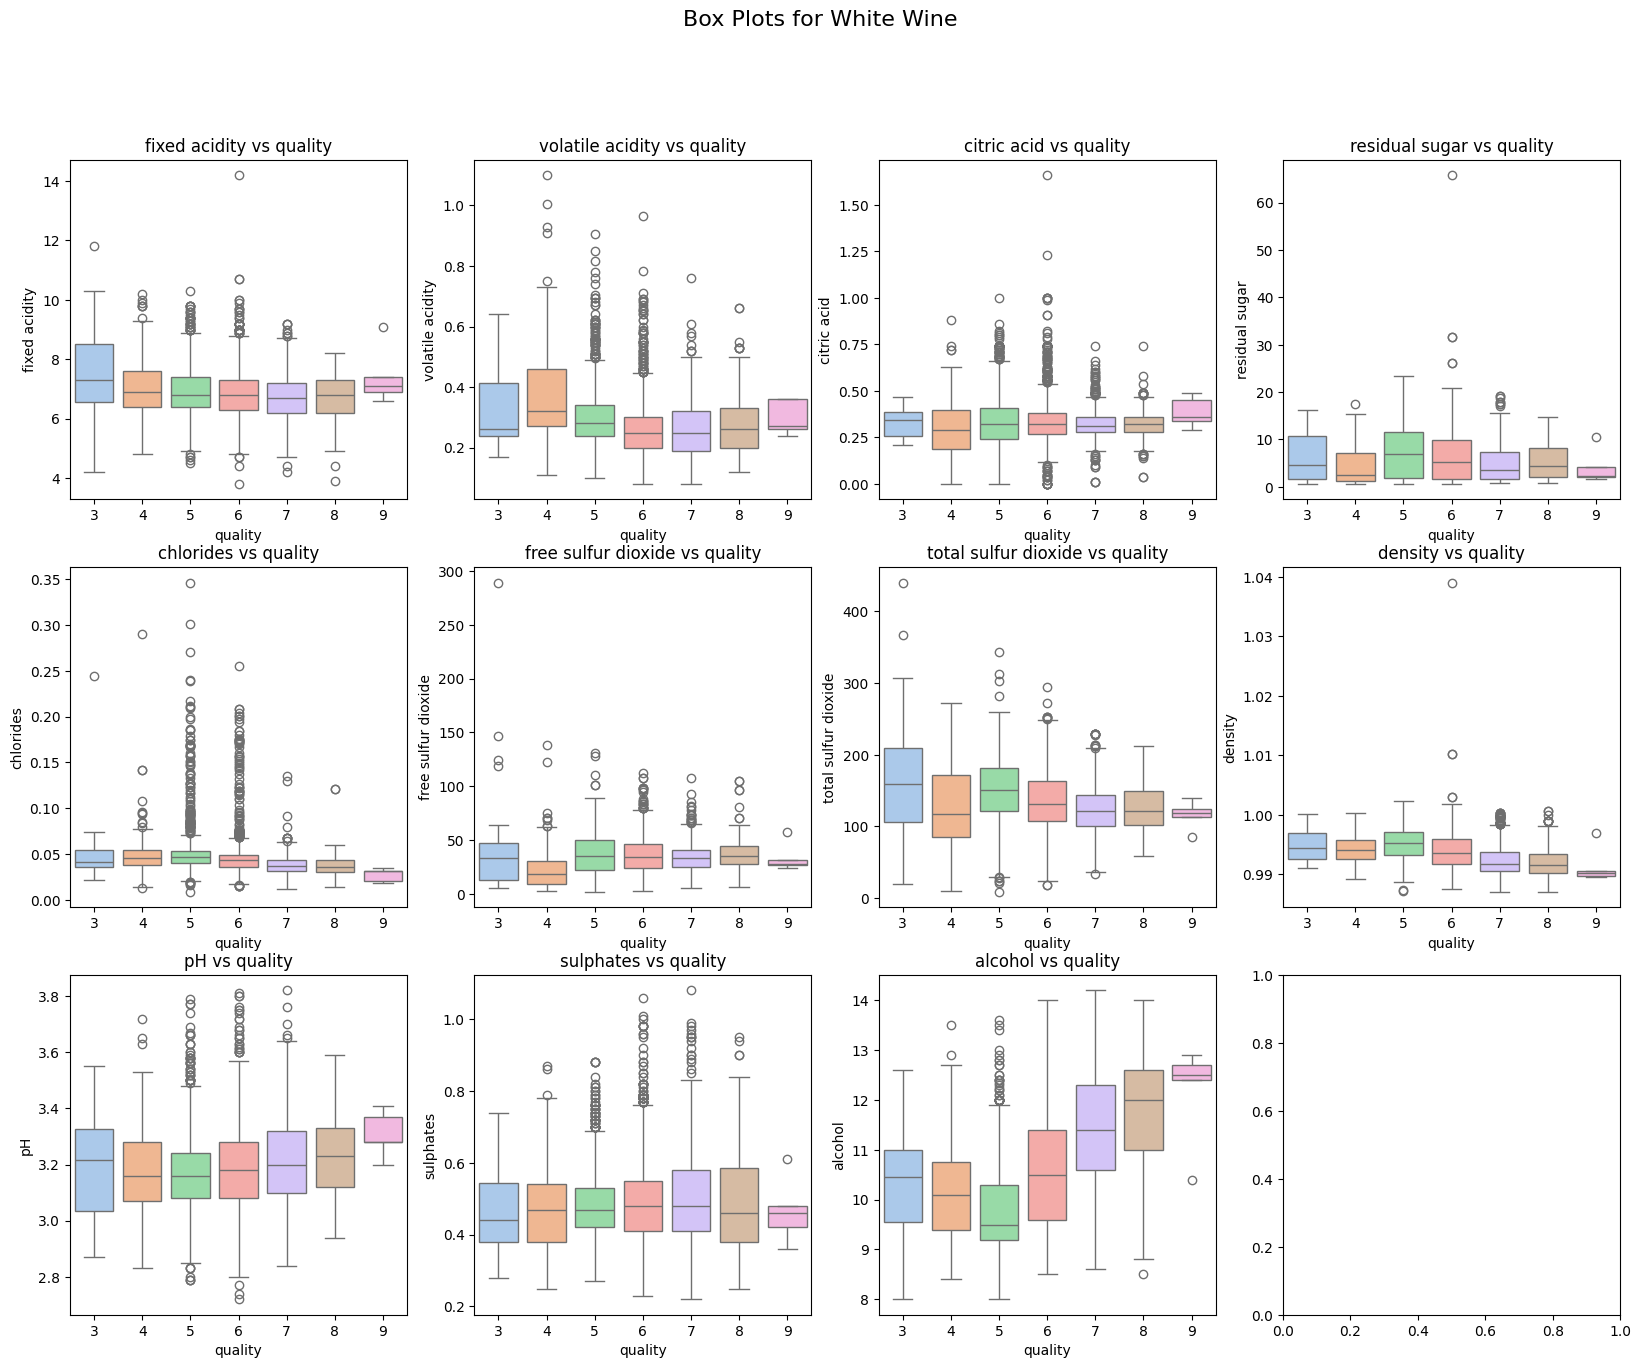

In [99]:
create_box_plot(df_white_wine)

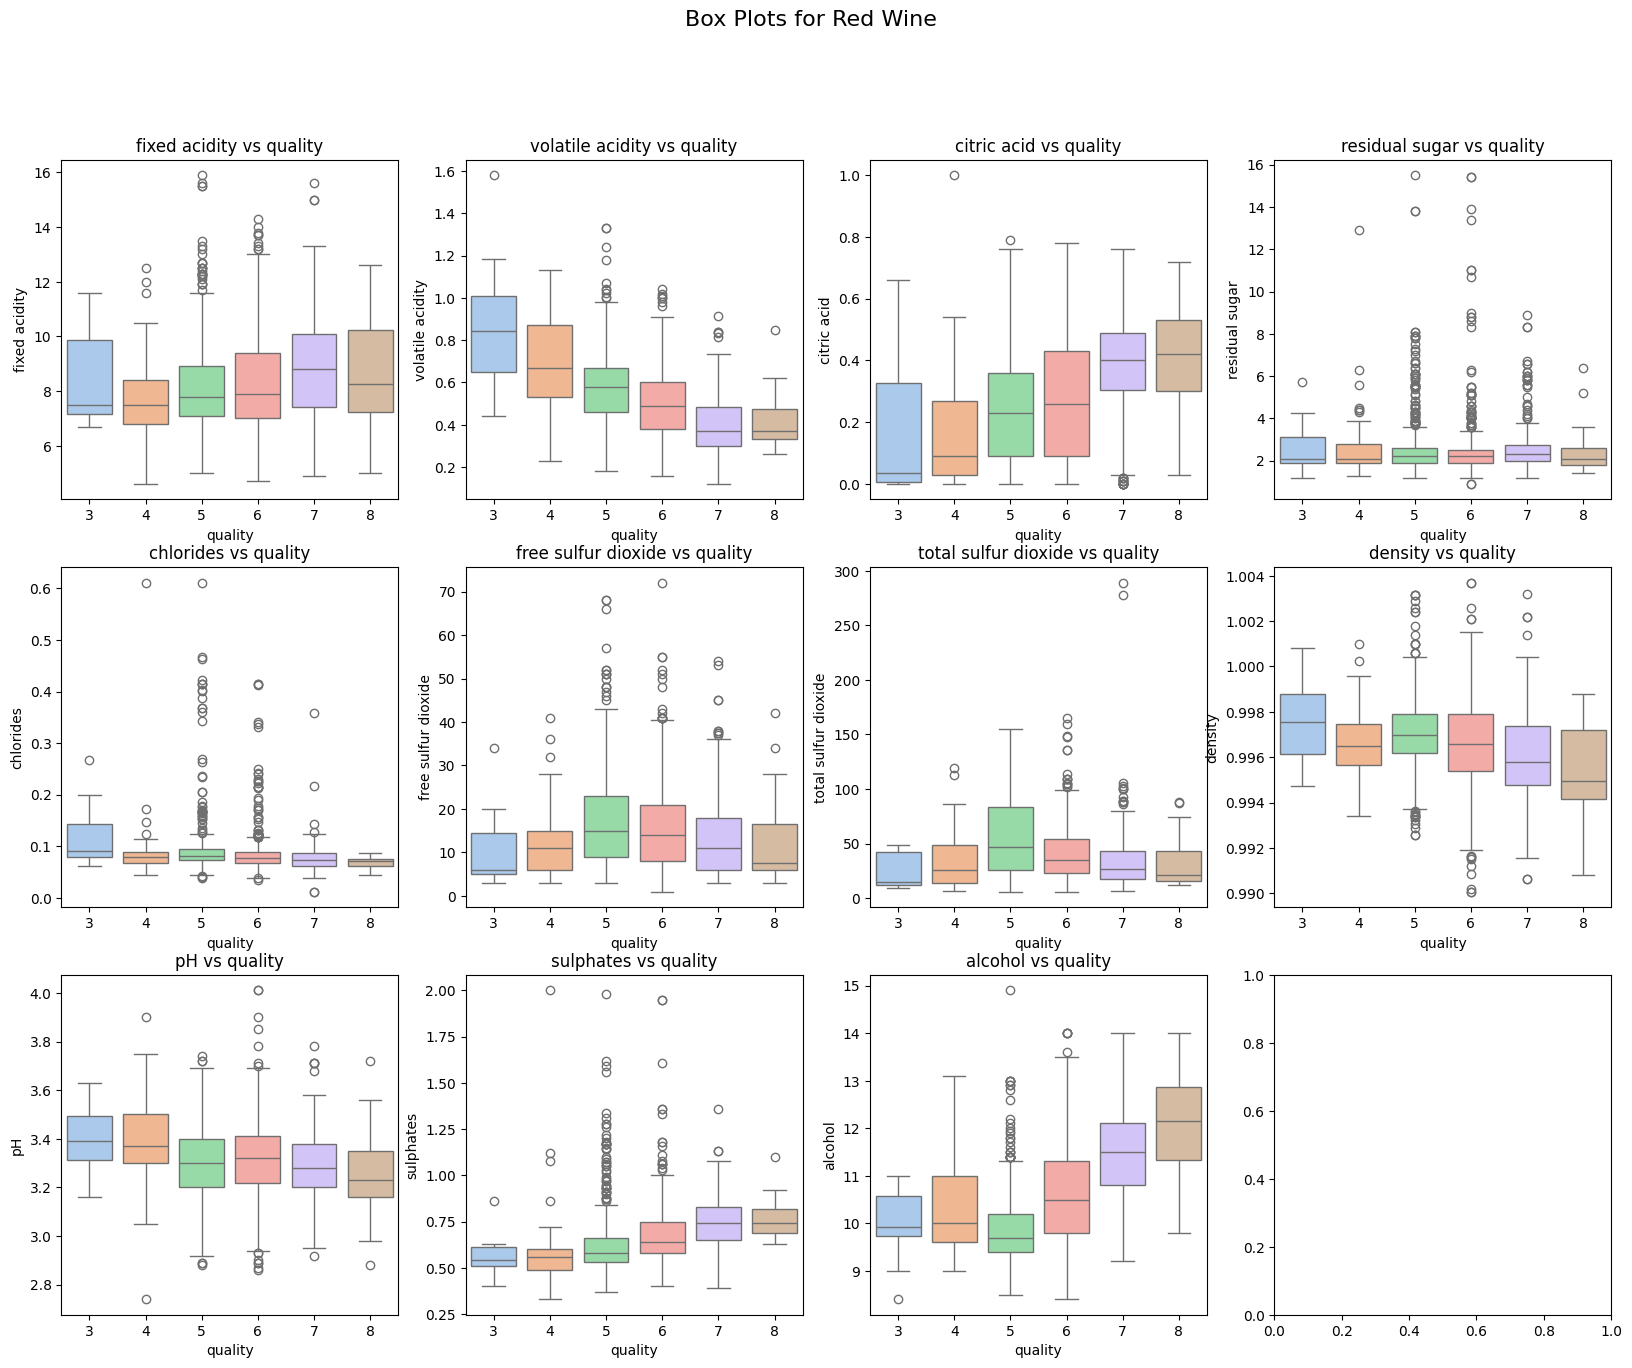

In [100]:
create_box_plot(df_red_wine)

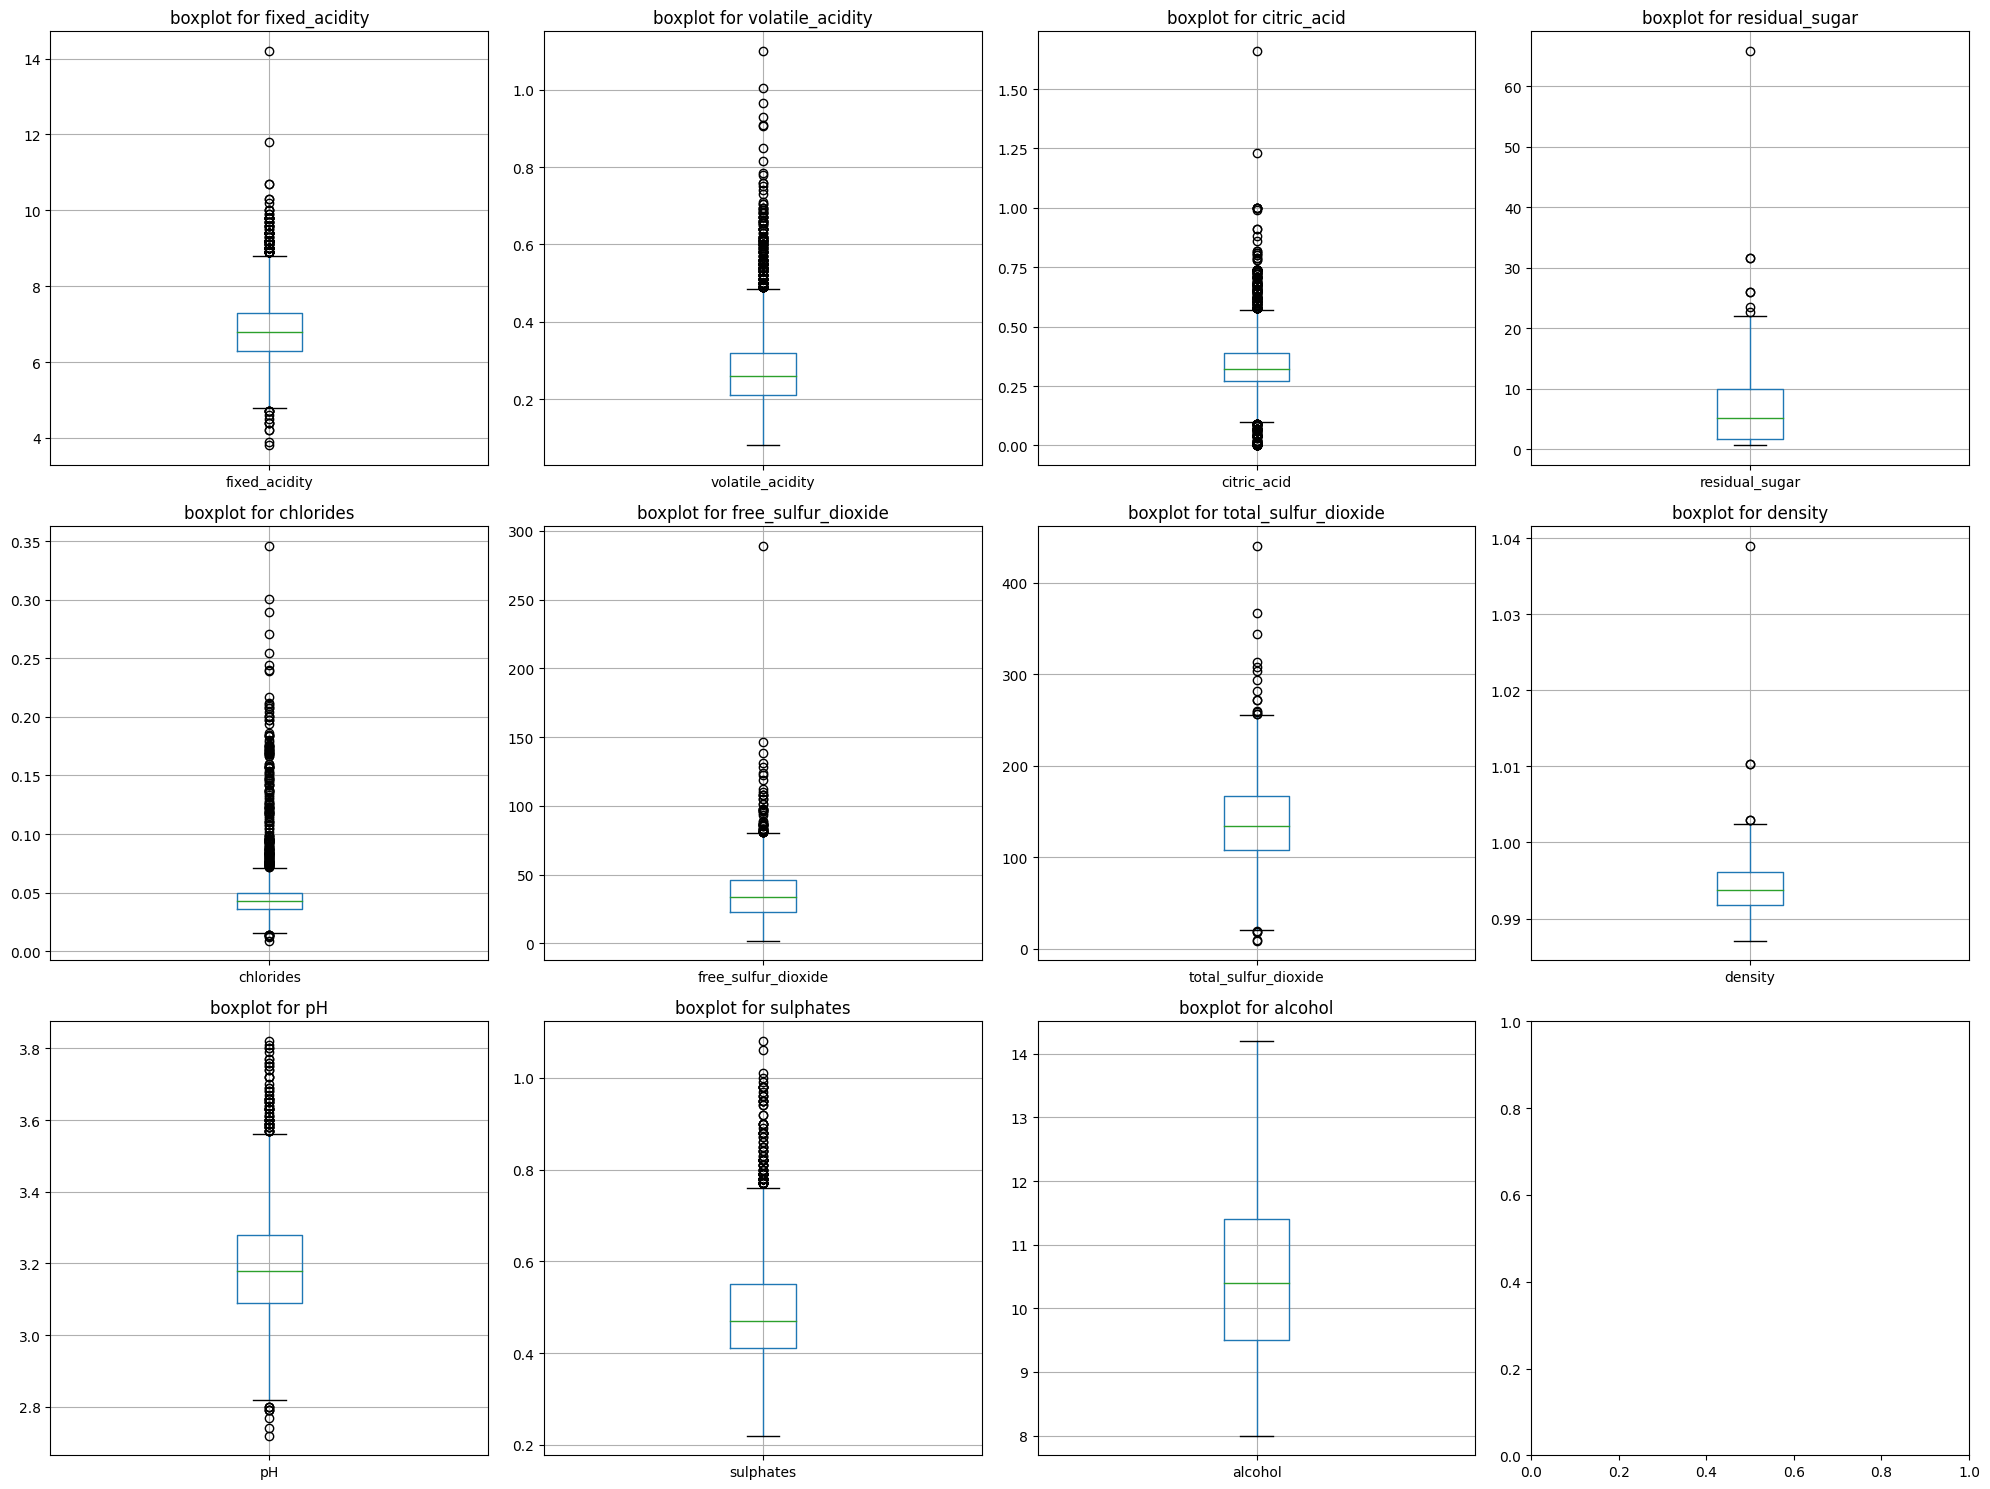

In [49]:
#boxplots
# Select only the numerical columns from the DataFrame
numerical_columns = df_wine_quality.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15)) 
axs = axs.flatten()


# Create a scatter plot for each feature column against the target
for i, column in enumerate(numerical_columns[:11]):
    data = df_wine_quality[column]
    df_wine_quality_features.boxplot(column = column, ax=axs[i])
    axs[i].set_title(f'boxplot for {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Delete the outliers

In [ ]:
def remove_outliers(df, column, lower_percentile, upper_percentile):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Create a mask where values are within the inter-percentile range
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    
    # Apply the mask to the DataFrame to keep rows without outliers
    return df[mask]

# Example usage: Remove outliers outside the 5th and 95th percentiles
#cleaned_df = remove_outliers(df_wine_quality_features, 'fixed_acidity', 0.00, 0.95)

heatmap

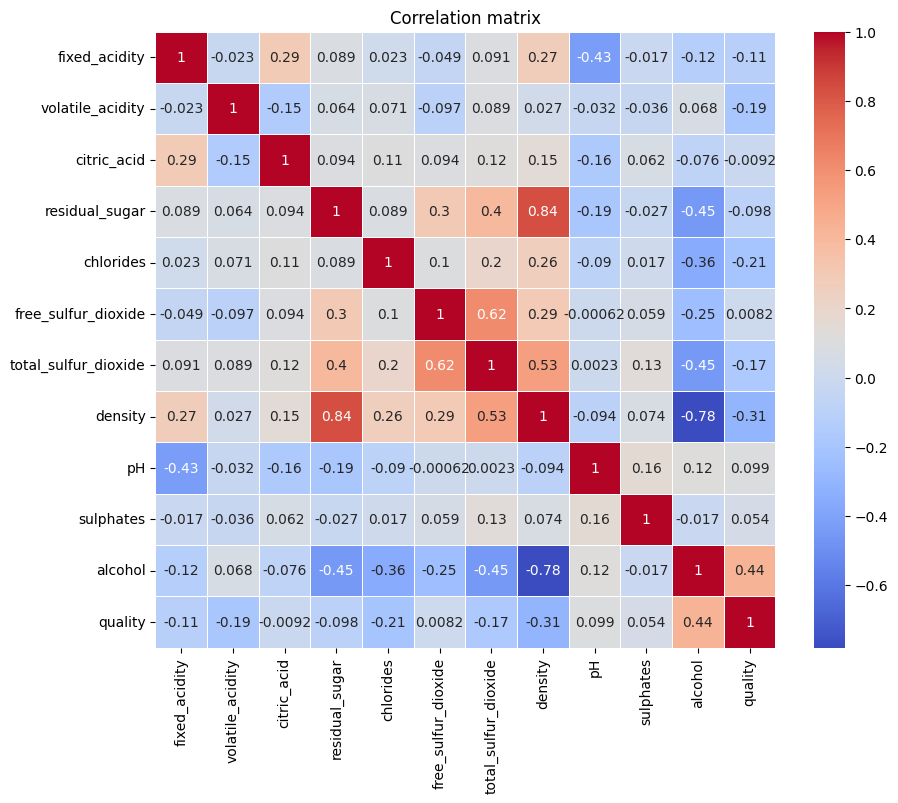

In [46]:
correlation_matrix = df_wine_quality.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=.5, ax=ax)
       # Sample figsize in inches

plt.title('Correlation matrix')
plt.show()


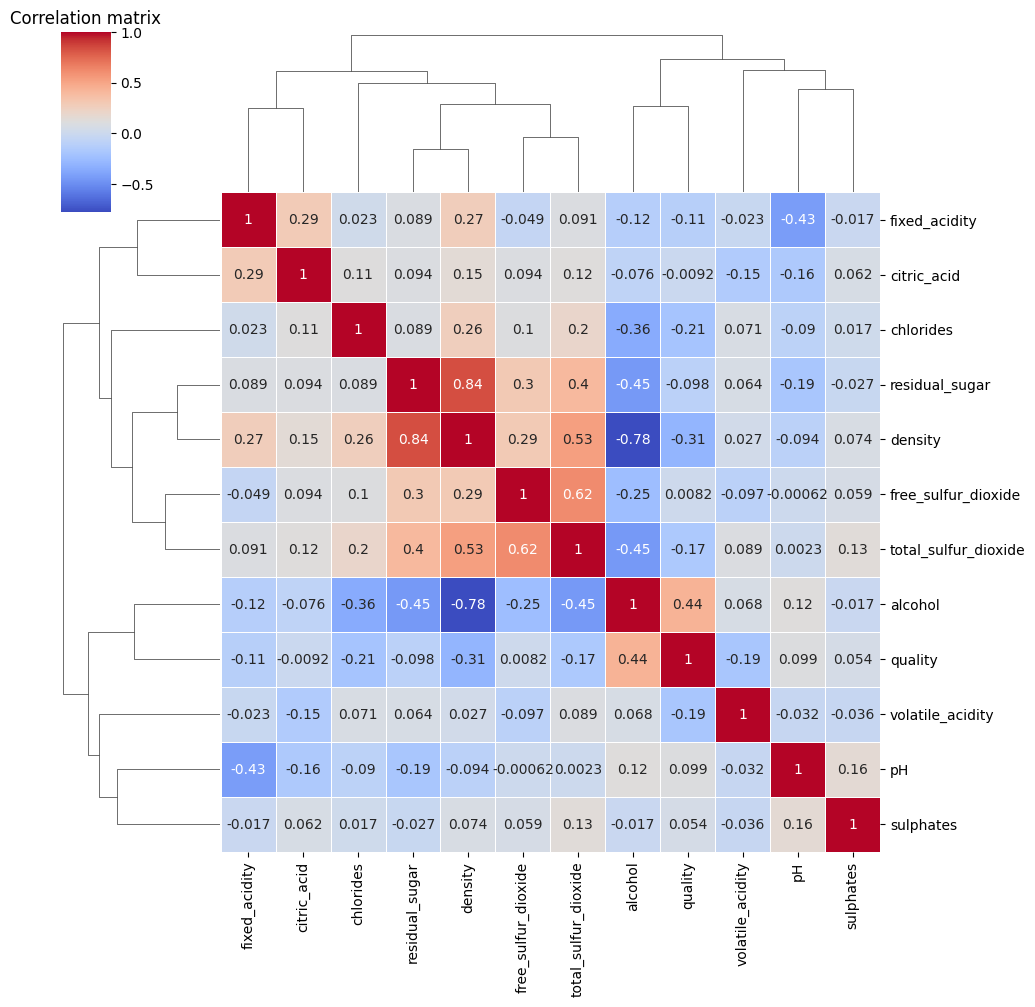

In [48]:
#clustermap
correlation_matrix = df_wine_quality.corr()
#fig, ax = plt.subplots(figsize=(10,8))  
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=.5,)
       # Sample figsize in inches

plt.title('Correlation matrix')
plt.show()

## EDA:

## Visualize Data

## Significant Statement

## Conclusion & Discussions